<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Roads_Tracks_infograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
!pip install contextily

In [12]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
ccd = ccd.to_crs("EPSG:2235")
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)
rail = rail.to_crs("EPSG:2235")
cols = ['NAME','geometry']
ccd = ccd[cols]
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [13]:
taz_name = "/content/drive/MyDrive/temp_dstep23/TAZ_analysis/DE_TAZ_2021_TRKGEN_region.shp"
taz = gpd.read_file(taz_name)
taz = taz.to_crs("EPSG:2235")

In [14]:
taz["FIS"] = taz['TRN_UTL_20'] + taz['LE_HOSP_20'] + taz['CONS_20'] + taz['MANU_20']
taz["SIS"] = taz['OT_SVCS_20'] + taz['ED_HEALTH_'] + taz['FINANCE_20'] + taz['PRO_BUS_20'] + taz['LE_HOSP_20'] + taz['INFO_20']
taz["FIS_per"] = taz["FIS"]/taz['TOT_20']*100
taz_grpd = taz.groupby("CCD").sum(numeric_only = True)
taz_grpd["FIS_per"] = taz_grpd["FIS"]/taz_grpd["TOT_20"]*100
taz_grpd["FIS_capita"] = taz_grpd["FIS"]/taz_grpd["POP_20"]
taz_grpd.reset_index(inplace=True)
taz_grpd.at[ 9, "CCD"] = "Lower Christiana"
taz_grpd.at[25, "CCD"] = "Upper Christiana"
taz_grpd.at[12, "CCD"] = "Middletown-Odessa"
taz_grpd.at[20, "CCD"] = "Pike Creek-Central Kirkwood"
ccd = ccd.merge(taz_grpd, left_on="NAME", right_on="CCD")

                                                    length_ft  length_miles
OWNER                                   STATUS                             
CSX Transportation                      Active   27370.423085      5.183794
National Railroad Passenger Corporation Active  173582.345333     32.875455
Norfolk Southern Corporation            Active   13594.687556      2.574752


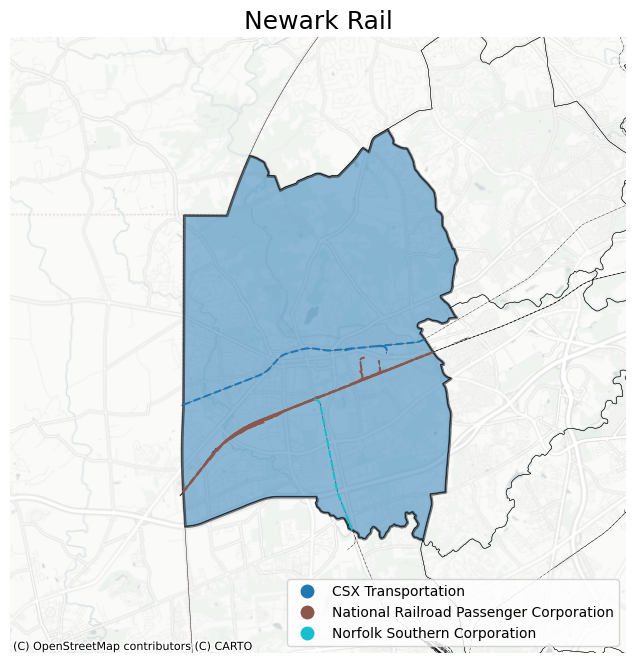

In [15]:
import contextily as cx

CCD = "Newark"
resol = 30000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

fig, ax = plt.subplots(figsize=(8,8))

plt.title(CCD + " Rail", fontdict={"fontsize":18})

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

intersect = gpd.overlay(rail[rail.STATUS=="Active"], ccd[ccd["NAME"]==CCD], how="intersection")
intersect.plot("OWNER", linestyle="--", ax=ax,
                        legend=True,
                        legend_kwds={'loc':"lower right"})

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394

print(intersect.groupby(["OWNER", "STATUS"]).sum(numeric_only = True)[["length_ft", "length_miles"]])

In [16]:
#road_invent = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Road_Inventory_2.0 (2)/Delaware_Road_Inventory_2.0.shp")

In [17]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [18]:
#Freight Movement Bottlenecks
FMB = gpd.read_file("/content/drive/MyDrive/FreightProfiles/FreightMovementBottlenecks/Delaware_Multimodal_2.0.shp")
FMB = FMB.to_crs("EPSG:2235")

In [19]:
FMB.columns

Index(['OBJECTID', 'TMC_CODE', 'CORRIDOR_I', 'DESCRIPTIO', 'NAME', 'MILES',
       'TMC', 'TMCTYPE', 'ROADNUMBER', 'ROADNAME', 'ISPRIMARY', 'COUNTY',
       'ZIP', 'DIRECTION', 'URBAN_CODE', 'FACILTYPE', 'STRUCTYPE',
       'HOURLY_CAP', 'TOTAL_THRU', 'TOTAL_CAPA', 'ROUTE_NUMB', 'ROUTE_SIGN',
       'ROUTE_QUAL', 'ALTRTENAME', 'TOTAL_AADT', 'UNIT_TRUCK', 'COMBINATIO',
       'TRUCK', 'AM_PEAK_RE', 'PM_PEAK_RE', 'SUM_PEAK_R', 'AM_RELIABI',
       'PM_RELIABI', 'SUMMER_REL', 'HOURLY_C00', 'TRUCK_AADT', 'TRUCK_PERC',
       'UNIT_PERCE', 'COMBINAT00', 'BOTTLENECK', 'PRIORITY', 'RANK',
       'geometry'],
      dtype='object')

In [20]:
FMB.TRUCK_PERC

0          7% to 9%
1          7% to 9%
2          7% to 9%
3         9% to 11%
4         9% to 11%
5          7% to 9%
6          7% to 9%
7          7% to 9%
8          7% to 9%
9         9% to 11%
10        9% to 11%
11         7% to 9%
12    11% and Above
13         7% to 9%
14         7% to 9%
Name: TRUCK_PERC, dtype: object

In [21]:
CFC.length * 0.000189394

0      4.124179
1      2.823466
2      0.815235
3      1.630089
4      1.704565
5      5.901573
6      2.450157
7      6.425413
8      5.516843
9      4.660229
10     2.227895
11     0.662741
12     0.741035
13     0.928668
14     0.404078
15     1.434925
16    26.074560
17     1.378032
18    17.751372
19     3.736288
20     2.377973
21     1.332453
22     0.374783
23     1.271331
24     4.074257
25    19.689312
26     0.804012
27     1.002108
28     0.298515
29     5.938863
30     5.089636
31     1.816864
32    11.172195
33    10.456265
34     4.763832
35    24.655174
36    37.264276
37     0.479434
38     5.660920
39    11.501132
40    23.442521
dtype: float64

In [22]:
CFC['FREIGHT_NE'].unique()

array(['CUFC', 'CRFC', 'PFN'], dtype=object)

In [23]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

<Axes: >

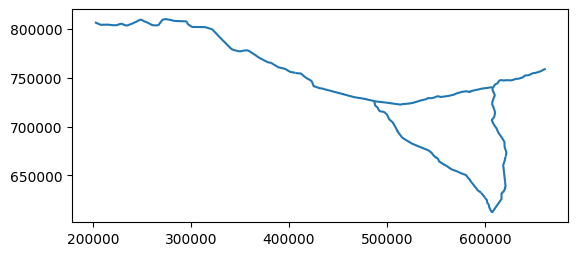

In [24]:
PiedmontCorridor.plot()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'colu

Empty DataFrame
Columns: [LENGTH, length_ft, length_miles]
Index: []
Empty DataFrame
Columns: [UNIT_TRUCK]
Index: []


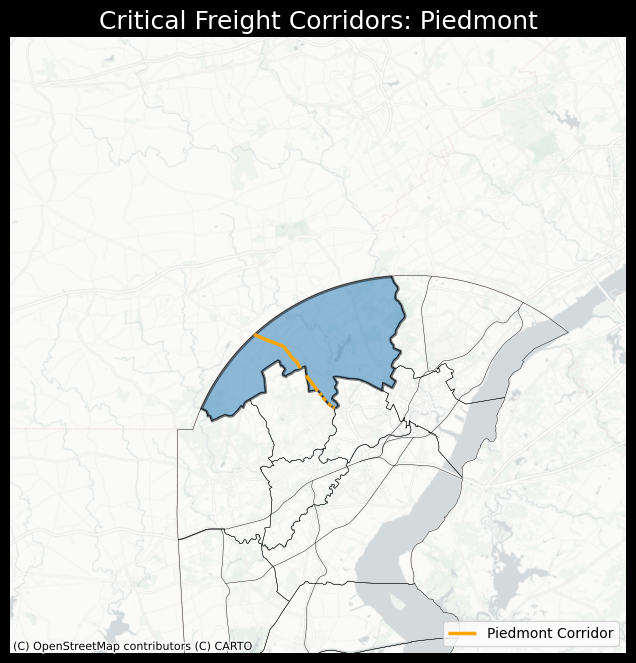

In [25]:
import contextily as cx

CCD = "Piedmont"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'white',
        'weight': 'normal',
        'size': 18}

fig, ax = plt.subplots(figsize=(8,8), facecolor="k")

plt.title("Critical Freight Corridors: " + CCD, fontdict=font)

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

metro_intercept = gpd.overlay(MetroCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
metro_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Metro Corridor', color="orange",
                             zorder=1);

piedmont_intercept = gpd.overlay(PiedmontCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
piedmont_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Piedmont Corridor', color="orange",
                             zorder=1);

bay_intercept = gpd.overlay(BayCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
bay_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Bay Corridor', color="orange",
                             zorder=1);

lewes_intercept = gpd.overlay(LewesCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
lewes_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Lewes Corridor', color="orange",
                             zorder=1);


coastal_intercept = gpd.overlay(CoastalCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
coastal_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Coastal Corridor', color="wheat",
                             zorder=1);

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect[intersect["FREIGHT_NE"]=='CUFC'].plot(linestyle="-", ax=ax,
                             label = 'CUFC', color="steelblue");
intersect[intersect["FREIGHT_NE"]== 'CRFC'].plot(linestyle="-", ax=ax,
                             label = 'CRFC', color="darkgreen");
intersect[intersect["FREIGHT_NE"]== 'PFN'].plot(linestyle="-", ax=ax,
                             label = 'PFN', color="peru");


bottleneck_intersect = gpd.overlay(FMB, ccd[ccd["NAME"]==CCD],
            how="intersection")

bottleneck_intersect.plot("ROADNAME", linestyle="-", ax=ax,
                             label = "Bottleneck", color="red");

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394
print(intersect.groupby("FREIGHT_NE").sum(numeric_only = True)[["LENGTH", "length_ft", "length_miles"]])
print(bottleneck_intersect.groupby("ROADNAME").sum(numeric_only = True)[["UNIT_TRUCK"]])

<Axes: >

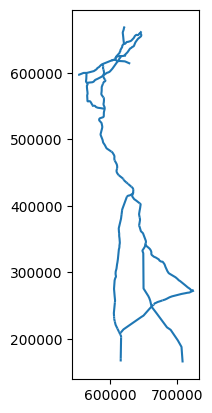

In [26]:
CFC.plot()

<Axes: >

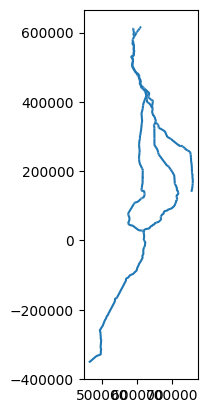

In [27]:
CoastalCorridor.plot()

In [28]:
plt.rcdefaults()

In [37]:
CCD = "Brandywine"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'black',
        'weight': 'normal',
        'size': 16}

# [left, bottom, width, height]


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empt

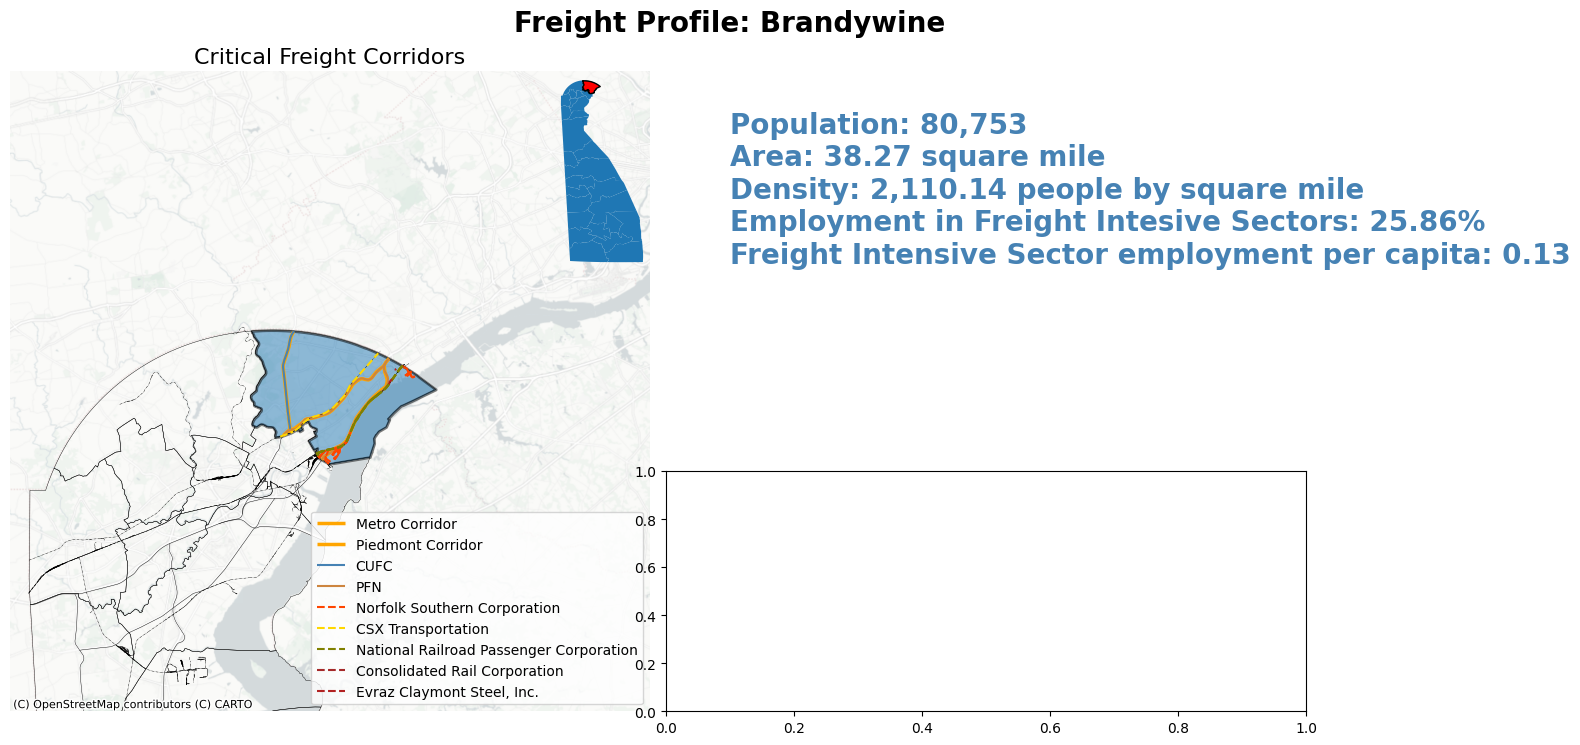

In [42]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_axes([0.05, 0.05, 0.4, 0.8])
plt.title("Critical Freight Corridors", fontdict=font)

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)



ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

metro_intercept = gpd.overlay(MetroCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
metro_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Metro Corridor', color="orange",
                             zorder=1);

piedmont_intercept = gpd.overlay(PiedmontCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
piedmont_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Piedmont Corridor', color="orange",
                             zorder=1);

bay_intercept = gpd.overlay(BayCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
bay_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Bay Corridor', color="orange",
                             zorder=1);

lewes_intercept = gpd.overlay(LewesCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
lewes_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Lewes Corridor', color="orange",
                             zorder=1);


coastal_intercept = gpd.overlay(CoastalCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
coastal_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Coastal Corridor', color="wheat",
                             zorder=1);

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect[intersect["FREIGHT_NE"]=='CUFC'].plot(linestyle="-", ax=ax,
                             label = 'CUFC', color="steelblue");
intersect[intersect["FREIGHT_NE"]== 'CRFC'].plot(linestyle="-", ax=ax,
                             label = 'CRFC', color="darkgreen");
intersect[intersect["FREIGHT_NE"]== 'PFN'].plot(linestyle="-", ax=ax,
                             label = 'PFN', color="peru");


bottleneck_intersect = gpd.overlay(FMB, ccd[ccd["NAME"]==CCD],
            how="intersection")

bottleneck_intersect.plot("ROADNAME", linestyle="-", ax=ax,
                             label = "Bottleneck", color="red");

rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

palette = ["orangered", "gold", "olive", "salmon", "tomato", "darksalmon",
           "coral", "indianred", "brown", "firebrick", "maroon"]

for i in range(len(rail["OWNER"].unique())):
  intersect_rail = gpd.overlay(rail[rail.OWNER==rail["OWNER"].unique()[i]], ccd[ccd["NAME"]==CCD], how="intersection");
  intersect_rail.plot("OWNER", linestyle="--", ax=ax, label = rail["OWNER"].unique()[i], color = palette[i]);

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

ax2 = fig.add_axes([0.37, 0.60, 0.1, 0.25])
ccd.plot(ax=ax2)
ccd[ccd['NAME'] == CCD].plot(ax=ax2, color="r", edgecolor="k", lw = 1)
ax2.set_axis_off()

ax3 = fig.add_axes([0.460, 0.40, 0.4, 0.45])
ax3.set_axis_off()

ax4 = fig.add_axes([0.460, 0.05, 0.4, 0.3])

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')

header = fig.text(0.5, 0.90, "Freight Profile: " + CCD, fontsize=20, color="k", weight="bold", ha="center")
content =  fig.text(0.5, 0.80,  "Population: " +  "{:,}".format(ccd[ccd["NAME"]==CCD]["POP_20"].values[0]) + "\n" +
                                "Area: " + "{:,.2f}".format(ccd[ccd["NAME"]==CCD].area.values[0]*3.58701e-8) + " square mile\n" +
                                "Density: " + "{:,.2f}".format(ccd[ccd["NAME"]==CCD]["POP_20"].values[0] / ccd[ccd["NAME"]==CCD].area.values[0] / 3.58701e-8) + " people by square mile\n" +
                                "Employment in Freight Intesive Sectors: " + "{:.2f}%".format(ccd[ccd["NAME"]==CCD]["FIS_per"].values[0]) + "\n" +
                                "Freight Intensive Sector employment per capita: " + "{:.2f}".format(ccd[ccd["NAME"]==CCD]["FIS_capita"].values[0]) + "\n" +
                                ""
                      , color="steelblue", weight="bold", va="top", fontsize=20)

fig.show()



In [31]:
rail["OWNER"].unique()

array(['Norfolk Southern Corporation', 'CSX Transportation',
       'National Railroad Passenger Corporation', 'State of Delaware',
       'East Penn Railroad LLC', 'NRG Energy Inc.',
       'Historic Red Clay Valley', 'Maryland & Delaware Railroad Company',
       'Consolidated Rail Corporation', 'Evraz Claymont Steel, Inc.'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotti

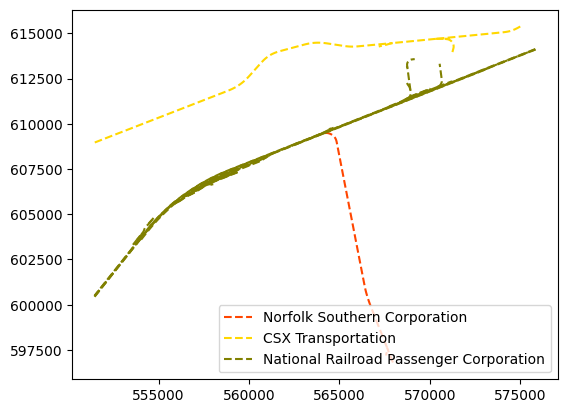

In [32]:
palette = ["orangered", "gold", "olive", "salmon", "tomato", "darksalmon", "coral", "indianred", "brown", "firebrick", "maroon"]
fig, ax = plt.subplots()
for i in range(len(rail["OWNER"].unique())):
  intersect_rail = gpd.overlay(rail[rail.OWNER==rail["OWNER"].unique()[i]], ccd[ccd["NAME"]=="Newark"], how="intersection")
  intersect_rail.plot("OWNER", linestyle="--", ax=ax, label = rail["OWNER"].unique()[i], color = palette[i])
ax.legend(loc='lower right')
fig.show()

In [33]:
intersect_rail = gpd.overlay(rail[rail.STATUS=="Active"], ccd[ccd["NAME"]==CCD], how="intersection")

In [34]:
len(rail["OWNER"].unique())

10

In [35]:
"{:.2f}".format(ccd[ccd["NAME"]==CCD]["FIS_per"].values[0])

'19.89'

In [36]:
ccd[ccd["NAME"]==CCD].area.values[0]

6910334800.852798